<a href="https://colab.research.google.com/github/amandacaravieri/CASE_CIA/blob/main/CASE_CIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1- Importação dos dados e Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Cursos /CASE_JustForYou/db_jfy.csv', ',')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,created,value,form_id,id-2,hair_type,age
0,0,2022-01-05 00:00:00+00,70.33,2d3f90ca-e262-4b32-8b57-80fb0170bf5a,2d3f90ca-e262-4b32-8b57-80fb0170bf5a,ondulado,20
1,1,2022-01-05 00:27:32.980132+00,51.44,3cb90d19-02a1-43f3-a36f-b421e41b3d2f,3cb90d19-02a1-43f3-a36f-b421e41b3d2f,ondulado,30
2,2,2022-01-05 00:55:05.960265+00,56.83,1cd08ffd-4e85-4f1d-bdc1-afb292b056db,1cd08ffd-4e85-4f1d-bdc1-afb292b056db,cacheado,38
3,3,2022-01-05 01:22:38.940397+00,91.51,d518ff19-df6a-445f-a13c-8b45b2addd7b,d518ff19-df6a-445f-a13c-8b45b2addd7b,cacheado,20
4,4,2022-01-05 01:50:11.92053+00,54.35,c2baa4bc-9fe3-4cfe-809f-c52a728fa5bb,c2baa4bc-9fe3-4cfe-809f-c52a728fa5bb,ondulado,29


#2- Exploração da base df

## Tamanho

In [4]:
df.shape

(5000, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         5000 non-null   int64  
 1   created    5000 non-null   object 
 2   value      5000 non-null   float64
 3   form_id    5000 non-null   object 
 4   id-2       5000 non-null   object 
 5   hair_type  5000 non-null   object 
 6   age        5000 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 273.6+ KB


In [6]:
df.describe().round(2)

,id,value,age
count,5000.00,5000.00,5000.00
mean,2499.50,74.88,33.05
std,1443.52,14.38,9.82
min,0.00,50.00,15.00
25%,1249.75,62.31,26.00
50%,2499.50,75.00,32.00
75%,3749.25,87.36,39.00
max,4999.00,100.00,75.00


##Valores únicos

In [7]:
print(len(set(df['form_id'])))

5000


##Período

In [8]:
#  1º DIA DE DADOS
print(df['created'].min())   

2022-01-05 00:00:00+00


In [9]:
# ÚLTIMO DIA DE DADOS
print(df['created'].max())   

2022-04-30 00:00:00+00


#3- Limpeza e ajuste da base df

## Drop coluna id-2

In [10]:
# Excluindo uma coluna
df.drop('id-2', axis=1, inplace=True) # inplace=True para substituir no data frame original
df.columns

Index(['id', 'created', 'value', 'form_id', 'hair_type', 'age'], dtype='object')

In [11]:
df.shape

(5000, 6)

## Datas

In [12]:
df["created"] = pd.to_datetime(df["created"], format='%Y-%m-%d %H:%M:%S')

In [13]:
date_col =  pd.DatetimeIndex(df['created'])
df['Mês']= date_col.month
df['Dia']= date_col.day
df.head()

,id,created,value,form_id,hair_type,age,Mês,Dia
0,0,2022-01-05 00:00:00+00:00,70.33,2d3f90ca-e262-4b32-8b57-80fb0170bf5a,ondulado,20,1,5
1,1,2022-01-05 00:27:32.980132+00:00,51.44,3cb90d19-02a1-43f3-a36f-b421e41b3d2f,ondulado,30,1,5
2,2,2022-01-05 00:55:05.960265+00:00,56.83,1cd08ffd-4e85-4f1d-bdc1-afb292b056db,cacheado,38,1,5
3,3,2022-01-05 01:22:38.940397+00:00,91.51,d518ff19-df6a-445f-a13c-8b45b2addd7b,cacheado,20,1,5
4,4,2022-01-05 01:50:11.920530+00:00,54.35,c2baa4bc-9fe3-4cfe-809f-c52a728fa5bb,ondulado,29,1,5


#4- Exportando para arquivo excel

In [14]:

df_excel = df

# Remove timezone from columns
df_excel['created']=df_excel['created'].dt.tz_localize(None)


In [15]:
# Export to excel
df_excel.to_excel('df_excel_2.xlsx')

# 5- Variáveis

##Idade

In [16]:
df_age_count= df.groupby('age')[['id']].count().sort_values(by='id', ascending=False)
df_age_count.head()

,id
age,
31,229
27,216
33,208
29,206
30,197


In [17]:
df_age_value=df.groupby('age')[['value']].sum().sort_values(by='value', ascending=False)
df_age_value.head()

,value
age,
31,17357.56
27,16037.97
33,15732.90
29,15527.58
30,14453.51


## Tipo de Cabelo

In [46]:
df_hair_count=df.groupby(['hair_type')[['id']].count().sort_values(by='id', ascending=False)
df_hair_count.head()

,,id
Mês,hair_type,
2,liso,580
4,liso,533
1,liso,452
2,cacheado,364
4,ondulado,354


In [ ]:
df2= 

In [19]:
df_hair_value=df.groupby('hair_type')[['value']].sum().sort_values(by='value', ascending=False)
df_hair_value

,value
hair_type,
liso,126166.03
ondulado,85430.79
cacheado,82363.36
crespo,80431.78


# 6- Visualização dos dados

## Gráfico 1: Faturamento x Mês

In [20]:
table_1 = pd.pivot_table(data=df,index=['Mês'],values = 'value', aggfunc='sum')
pd.DataFrame(table_1)

,value
Mês,
1,101773.46
2,114878.21
3,46028.24
4,111712.05


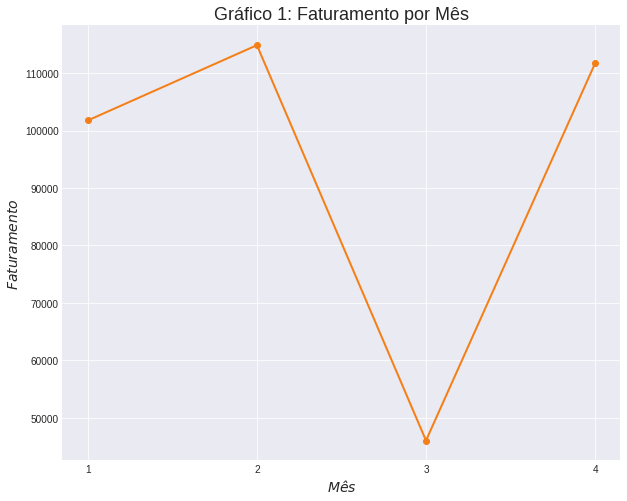

In [21]:

# tamanho da figura
plt.figure(figsize=(10, 8))
 
# Labels
plt.xlabel(r"$Mês$",fontsize = 14)
plt.ylabel(r"$Faturamento$",fontsize = 14)
plt.title("Gráfico 1: Faturamento por Mês",fontsize = 18)
# Ajeitando o eixo X
plt.xticks(range(len(df['Mês'])))
# plot
plt.plot(table_1, color='#F57F17', marker='o',linewidth=2)

## Gráfico 2: Faturamento x Mês (Agrupado por tipo de cabelo)


In [22]:
table_2= pd.pivot_table(data=df,index=['Mês'],columns= 'hair_type',values = 'value', aggfunc='sum')
pd.DataFrame(table_2)

hair_type,cacheado,crespo,liso,ondulado
Mês,,,,
1,19753.01,23575.44,33883.06,24561.95
2,27348.53,21293.11,43116.03,23120.54
3,12456.39,13461.57,9071.83,11038.45
4,22805.43,22101.66,40095.11,26709.85


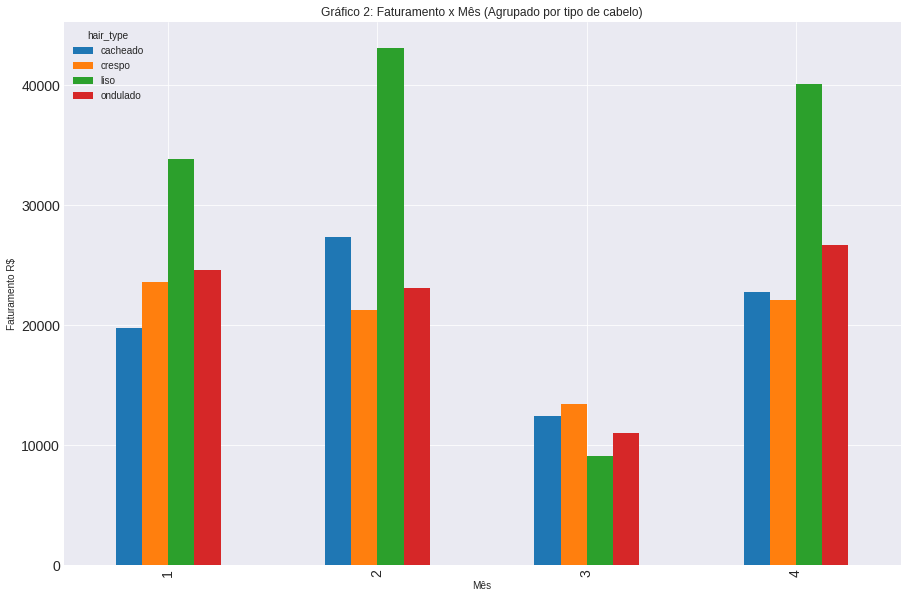

In [23]:
table_2.plot(kind='bar',figsize=(15,10), ylabel='Faturamento R$', title = 'Gráfico 2: Faturamento x Mês (Agrupado por tipo de cabelo)',
             fontsize=14,xlabel = 'Mês')


## Gráfico 3: Vendas x Idade

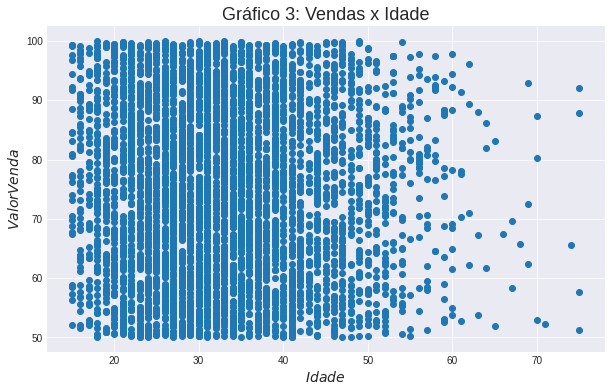

In [24]:
plt.figure(figsize=(10,6))
x = df['age']
y = df['value']
plt.xlabel(r"$Idade$",fontsize = 14)
plt.ylabel(r"$Valor Venda$",fontsize = 14)
plt.title("Gráfico 3: Vendas x Idade",fontsize = 18)
plt.scatter(x,y)
plt.show()



## Grafico 4: Boxplot Idade

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


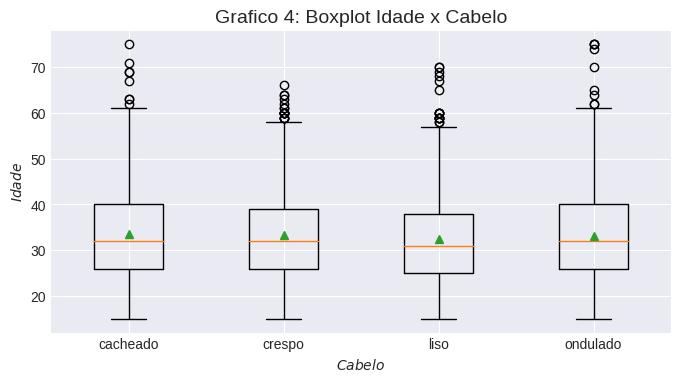

In [57]:

data = [df.groupby('hair_type')['age'].get_group('cacheado'), df.groupby('hair_type')['age'].get_group('crespo'), df.groupby('hair_type')['age'].get_group('liso'), df.groupby('hair_type')['age'].get_group('ondulado')]
plt.figure(figsize=(8,4), dpi=100)
plt.ylabel(r"$Idade$",fontsize = 10)
plt.xlabel(r"$Cabelo$",fontsize = 10)
plt.title("Grafico 4: Boxplot Idade x Cabelo",fontsize = 14)
plt.boxplot(data, labels =['cacheado','crespo','liso','ondulado'],showmeans = True)
plt.show()

## Gráfico 5: Faturamento Total x Idade

In [ ]:
table_3 = pd.pivot_table(data=df,index=['age'],values = 'value', aggfunc='sum')
pd.DataFrame(table_3)

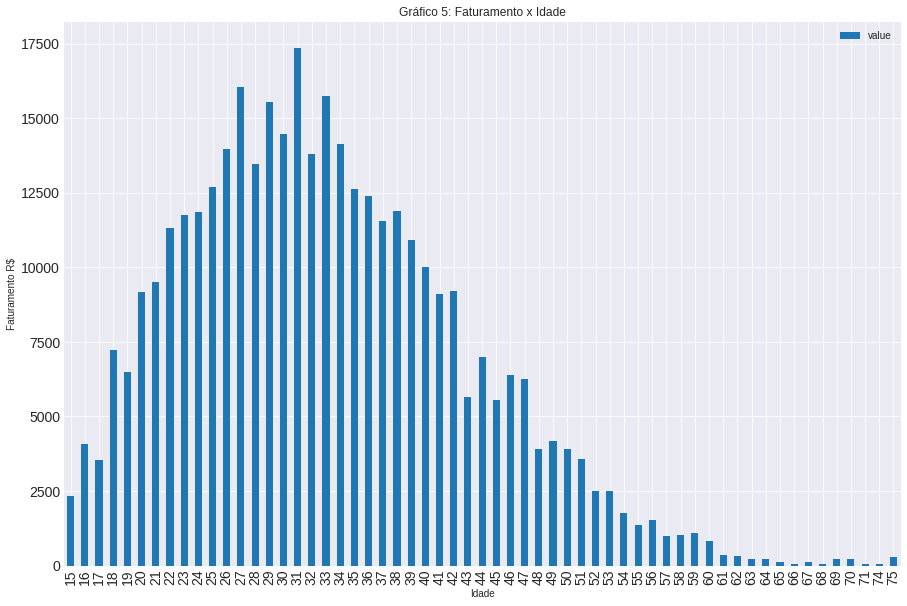

In [ ]:
table_3.plot(kind='bar',figsize=(15,10), ylabel='Faturamento R$', title = 'Gráfico 5: Faturamento x Idade',fontsize=14,xlabel = 'Idade')


#7- Correlação

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,id,value,age,Mês,Dia
id,1.00,0.01,-0.03,0.96,0.24
value,0.01,1.00,-0.01,0.01,-0.00
age,-0.03,-0.01,1.00,-0.03,-0.01
Mês,0.96,0.01,-0.03,1.00,-0.01
Dia,0.24,-0.00,-0.01,-0.01,1.00
